# Evolution of Einstein's equations

# Initial data constants definition

# Initial data , setting length of the domain and discretization


In [580]:
m=3;
res=m;
N=2.0^m*600.0;#2.0^m*100.0;
Xf=1.0;

dx=Xf/N;
dt=round(dx*0.4,digits=10);
Nt=100.0*2^m*10
Tf=Nt*dt; #final time

println("the final time is ", Tf)

the final time is 0.6666664


In [581]:
print(N)

4800.0

In [582]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)
println("epsilon <= dx/dt * (1/2)^(2*2-1) = ", dx/dt*(1/2)^(2*2-1))

println("epsilon = dx/dt * (1/2)^(2*2) = ", dx/dt*(1/2)^(2*2))

println("epsilon = dx/dt * (1/2)^(2*3) = ", dx/dt*(1/2)^(2*3))

println("epsilon = dx/dt * (1/2)^(2) = ", dx/dt*(1/2)^(2))

dx =0.00020833333333333335
dt =8.33333e-5
dx/dt =2.5000010000004003
epsilon <= dx/dt * (1/2)^(2*2-1) = 0.31250012500005003
epsilon = dx/dt * (1/2)^(2*2) = 0.15625006250002502
epsilon = dx/dt * (1/2)^(2*3) = 0.039062515625006254
epsilon = dx/dt * (1/2)^(2) = 0.6250002500001001


In [583]:
# Setting RESOLUTION

global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res$res"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3"

In [584]:
println(dx)
println(dt)

0.00020833333333333335
8.33333e-5


In [585]:
epsilon=0.1##0.01#0.05; #05; #02;#0.05; #0.05; #0.05;#0.05;#0.05; #dissipation strength (-1 for backwards integration)

0.1

# Grid

In [586]:
ori=0.0;
X1 = nothing
X1=range(ori, stop=Xf, step=dx);

println(size(X1))
println(X1)

(4801,)
0.0:0.00020833333333333335:1.0


In [587]:
print(dx)
X = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(X);
println("step size is  ", dx)

#T=range(dt,stop=Tf,step=dt)
T=range(0,stop=Tf-dt,step=dt)
println("the time step is ", dt)
println(size(T))
println(size(X))

println(X[L-3])
println(L)

0.00020833333333333335step size is  0.00020833333333333335
the time step is 8.33333e-5
(8000,)
(4807,)
1.0
4807


In [588]:
radius=zeros(L)
print(L)
print(size(X1))
print(X1[1001])
for i in 1:L
    radius[i]=X[i]/(1-X[i])
end


4807(4801,)0.20833333333333334

In [589]:
include("./ScalarField.jl");

In [590]:
using Interpolations

# Initial data of m β Ψ and Ψ,x

In [591]:
using PyCall   


scipy = pyimport("scipy")
scipyinterpolate = pyimport("scipy.interpolate")


####

initphi=zeros(L);
initphibar=zeros(L);

#PHI,X

r0=0.7
sigma=0.3
A=0.1449
initphibar[4:L-3] = init_gaussian_der(X1,r0,sigma,A)



#PHI FROM PSI,X
spl = scipyinterpolate.splrep(X[4:L-3], initphibar[4:L-3],k=3)
phi0=0
SFconstraint_phi_new(phi0,x) = scipyinterpolate.splev(x, spl)
initphi[4:L-3] = rungekutta4(SFconstraint_phi_new,phi0,X1)


#PHI
"initphi = init_gaussian(R,r0,sigma,A)"




"initphi = init_gaussian(R,r0,sigma,A)"

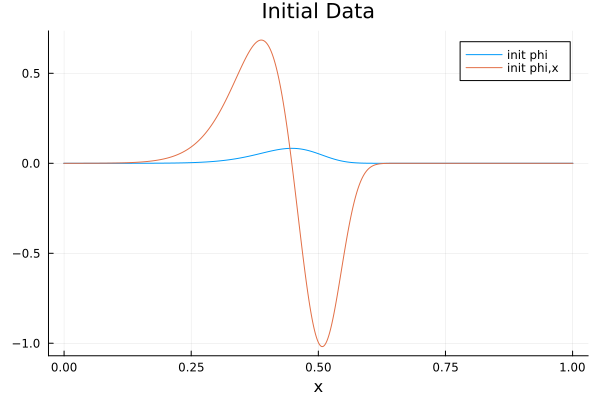

In [592]:
using Plots #showing initial data and the initial status of the horizon finder
plot(X, [initphi initphibar], xaxis="x",title="Initial Data", labels=["init phi" "init phi,x"])

In [593]:
initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initpsibar=zeros(L);
state_array=[initm initbeta initpsi initpsibar];


#PSI
initpsi = initphi .* X ./ (1 .- X)
initpsi[L-3]=0
state_array[:,3]=initpsi;
state_array=ghost(state_array);


#PSI,X
initpsibar = initphibar .* X ./ (1 .- X) +  initphi ./ (1 .- X) .^2
initpsibar[L-3]=0
state_array[:,4]=initpsibar;
state_array=ghost(state_array);


#BETA
beta0=0
initbeta[4:L-3]=rungekutta4(SFconstraint_beta,beta0,X1)
state_array[:,2]=initbeta;
state_array=ghost(state_array);


#M
m0=0
initm[4:L-3]=rk4wrapper(SFconstraint_m,m0,X1,0)
state_array[:,1]=initm;
state_array=ghost(state_array);


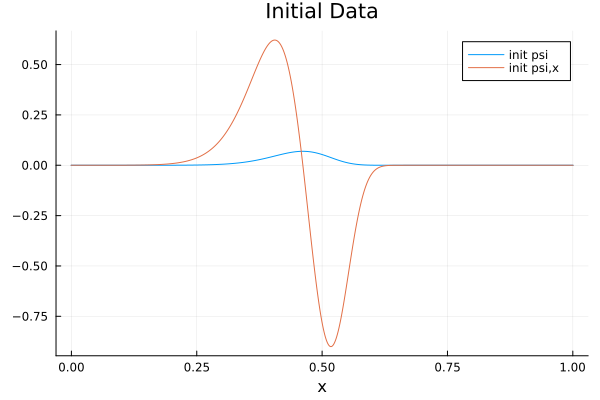

In [594]:
using Plots #showing initial data and the initial status of the horizon finder
plot(X, [initpsi initpsibar], xaxis="x",title="Initial Data", labels=["init psi" "init psi,x"])

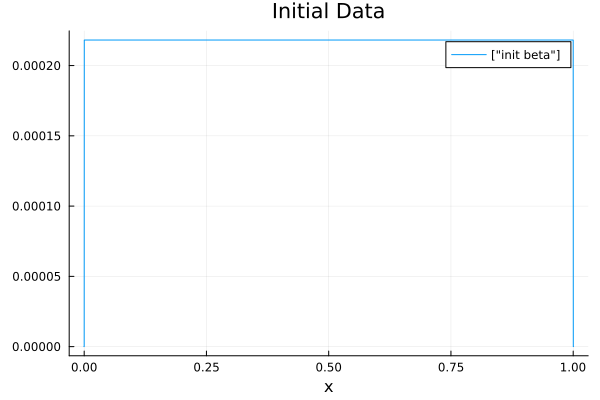

In [595]:
using Plots #showing initial data and the initial status of the horizon finder
plot(X, initbeta, xaxis="x",title="Initial Data", labels=["init beta"])

In [596]:
#monitor_ratio = 1-v/rexp(-2beta)
monitor_ratio = zeros(L)
for i in 1:L
    monitor_ratio = 2*state_array[:,1]/X[i]*(1-X[i])
    if monitor_ratio[i]>0.6
        print("hey BH")
    end
end

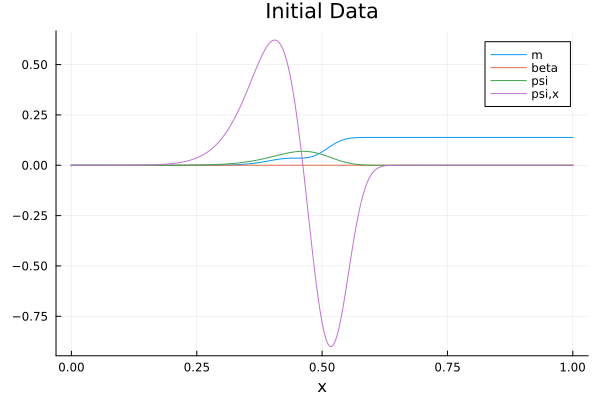

In [597]:
using Plots #showing initial data and the initial status of the horizon finder
plot(X, state_array, xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, xlim=[0.4, 1])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [598]:
using CSV, Tables
CSV.write(dir*"/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3/time_step0.csv"

 ## Time evolution

In [599]:
using Interpolations
using ProgressMeter
@showprogress for k in 1:length(T)

    #evolve psi,x
    state_array=rungekutta4molstep(SF_RHS,state_array,T,k,0) #evolve psi,x
    state_array=ghost(state_array)
    
    #calculate psi from psi,x
   " interp = cubic_spline_interpolation(X[4:L-3], state_array[4:L-3,4],  extrapolation_bc = Line())

    psi0=0
    SFconstraint_psi_new(psi0,X1) = interp.(X1)

    state_array[:,3] = rungekutta4(SFconstraint_psi_new,psi0,X)
    state_array=ghost(state_array)"
    
    #calculate psi form psi,x
    spl = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,4],k=5)
    psi0=0
    SFconstraint_psi_new(psi0,X) = scipyinterpolate.splev(X, spl)
    state_array[4:L-3,3] = rungekutta4(SFconstraint_psi_new,psi0,X1)
    state_array=ghost(state_array);
    
    #evolve m
    m0=0
    state_array[4:L-3,1]=rk4wrapper(SFconstraint_m,m0,X1,T)
    
    state_array=ghost(state_array)
    
    #evolve beta
    beta0=0
    state_array[4:L-3,2]=rungekutta4(SFconstraint_beta,beta0,X1)
    
    state_array=ghost(state_array)
    
    CSV.write(dir*"/time_step$k.csv", Tables.table(state_array), writeheader=false)
end

LoadError: InterruptException:

In [560]:
print(dir)

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1

## Movie of the evolution

In [600]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 1100:1:1250#length(T)-1
    time_step=T[n+1]-T[n];
    IJulia.clear_output(true)
    functions3=DataFrame(CSV.File(dir*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
    d=round(T[n],digits=1)
    plot!(X1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"],ylim=[-1, 1], xlim=[0, 1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3/time_step1100.csv" is not a valid file or doesn't exist